# London Housing and Population Analysis (2002 - 2015 data)

## 8. 2002 - 2015 Comparison (Focus Borough Identification)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

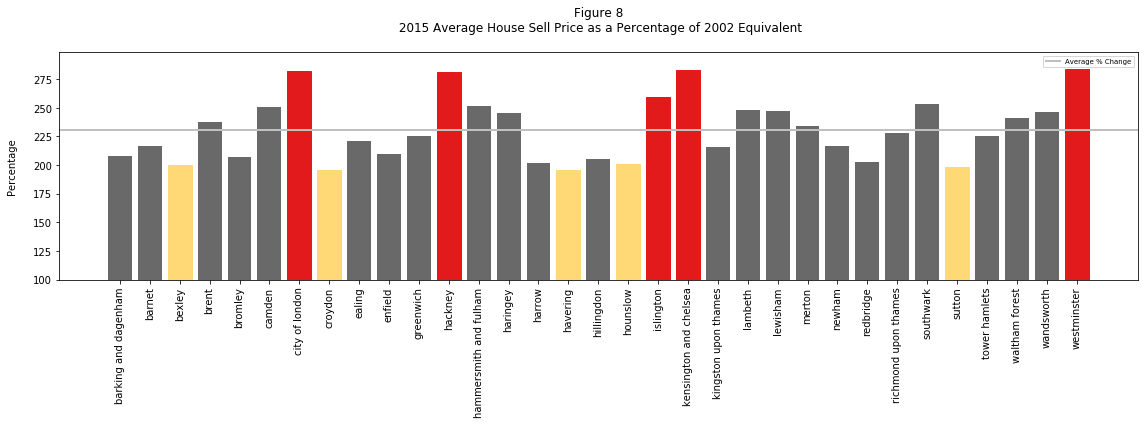

In [28]:
df = pd.read_csv('..raw_data/pops_sales_and_prices.csv', index_col=[0])
df['year'] = df['year'].astype('str')

""" Compare 2002 with 2015, both populations and house sell prices: """
borough_view = df.sort_values(by='year').groupby('borough')

# Determine 2002 and 2015 borough population:
start_pop = borough_view['all_ages'].first().reset_index()
end_pop = borough_view['all_ages'].last().reset_index()
pop_ranges = pd.merge(start_pop, end_pop, how='left', on=['borough'])
pop_ranges = pop_ranges.rename(columns={'all_ages_x': 'pop_2002', 'all_ages_y': 'pop_2015'})

# Show change:
pop_ranges['pop_growth'] = pop_ranges['pop_2015'] - pop_ranges['pop_2002']
pop_ranges['pop_pct_change'] = 100*(pop_ranges['pop_2015'] / pop_ranges['pop_2002'])

# Determine 2002 and 2015 borough house sell prices:
start_prices = borough_view['average_price'].first().reset_index()
end_prices = borough_view['average_price'].last().reset_index()
price_ranges = pd.merge(start_prices, end_prices, how='left', on=['borough'])
price_ranges = price_ranges.rename(columns={'average_price_x': 'price_2002', 'average_price_y': 'price_2015'})

# Show change:
price_ranges['price_pct_change'] = 100*(price_ranges['price_2015'] / price_ranges['price_2002'])

# Identify focus boroughs - 5 with biggest pct change in prices, 5 with smallest:
ordered_prices = price_ranges.sort_values(by='price_pct_change', ascending=False)
top_x = ordered_prices['borough'].iloc[:5].tolist()
bottom_x = ordered_prices['borough'].iloc[-5:].tolist()

x = price_ranges['borough'].tolist()
y = price_ranges['price_pct_change'].tolist()

top_indices = []
for i in top_x:
    j = x.index(i)
    top_indices.append(j)

bottom_indices = []
for i in bottom_x:
    j = x.index(i)
    bottom_indices.append(j)

# Plot 2015 prices as a percentage of the 2002 equivalent:
fig, ax = plt.subplots(figsize=(16, 6))
fig = plt.bar(x, y, color='dimgrey') 
for index in top_indices:
    fig[index].set_color('#e31a1c')
for index in bottom_indices:
    fig[index].set_color('#fed976')
ax.set_ylim(100, )
ax.set_xticklabels(x, rotation=90)

mean_price_pct_change = price_ranges['price_pct_change'].mean()
ax.axhline(mean_price_pct_change, color='silver', linewidth=2, label='Average % Change')
ax.legend(fontsize='x-small')
plt.ylabel('Percentage\n')
plt.title('Figure 8\n 2015 Average House Sell Price as a Percentage of 2002 Equivalent\n')
plt.tight_layout()
plt.savefig('../images/Fig8_pct_change_borough_price.png')
plt.show()

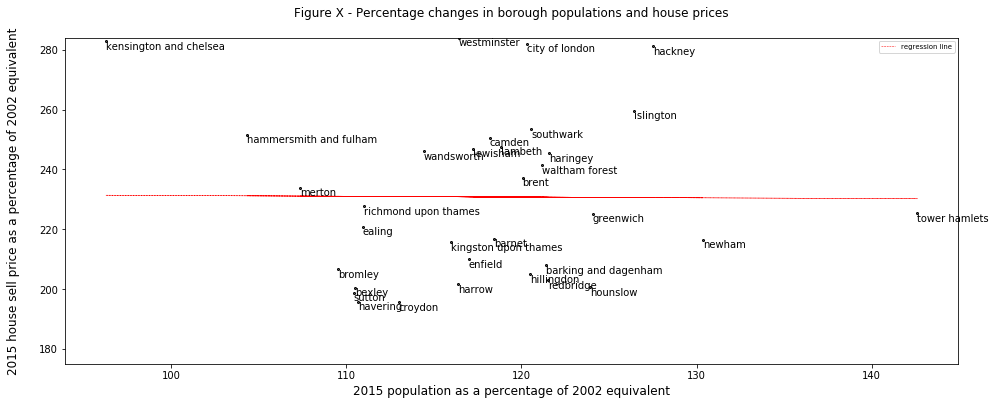

In [26]:
"""Is there a correlation between changes in prices and changes in population numbers?"""

# Plot change in population against change in prices:
ranges = pd.merge(pop_ranges, price_ranges, how='left', on=['borough'])
x = ranges['pop_pct_change']
y = ranges['price_pct_change']
boroughs = ranges['borough']
fig, ax = plt.subplots(figsize=(16, 6))

plt.scatter(x, y, s=4, c='dimgrey', edgecolors='k')
for i, txt in enumerate(boroughs):
    ax.annotate(txt, (x[i], y[i]), fontsize=10, fontstretch='semi-condensed', fontweight='light', 
    wrap=True, ha='left', va='top')
plt.ylim([175, y.max()])

m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x + c, color='red', linestyle='--', linewidth=0.5, label='regression line')
plt.legend(fontsize='x-small')
font = {'size': 12,}

plt.xlabel('2015 population as a percentage of 2002 equivalent', fontdict=font)
plt.ylabel('2015 house sell price as a percentage of 2002 equivalent\n', fontdict=font)
plt.title('Figure X - Percentage changes in borough populations and house prices\n')

# Considered 'Figure X' as this code is incomplete and I am uncertain of the utility of this visual.
# plt.savefig('FigX_pct_change_pops_and_prices.png')
plt.show()

*Does comparing percentage changes of two variables provide insight?*


This analysis implies there is no correlation between percentage change in population and percentage change in house prices
in London boroughs.    
This may well be the case in e.g. Kensington and Chelsea where there is a clear increase in price despite decrease in population; a different factor may be at play e.g. foreign investment in local property.


_The visual could be improved by changing the position of the labels._